__Lab 01 - Analysis__

Student Names: Alec Braynen, Jasmin Kuar

Group Number: 7

# Setup

Import the all these python libraries:

In [102]:
%matplotlib notebook
import numpy as np
import scipy.spatial as spatial
import matplotlib.pyplot as plt


print("✔️ OK to continue!")

✔️ OK to continue!


# Load Responses

Use `np.load()` to load your resp files. Make sure to load all 6 responses into 6 seperate lists or numpy arrays.

In [103]:
# BITFILE 1 Response
data = np.load("../Responses/fpga0_resp1_bitfile1_alec_50k.npz")
fpga0_resp1 = data['response']
print("List  size is:", len(fpga0_resp1))

data = np.load("../Responses/fpga0_resp2_bitfile1_alec_50k.npz")
fpga0_resp2 = data['response']
print("List  size is:", len(fpga0_resp2))

data = np.load("../Responses/fpga0_resp3_bitfile1_alec_50k.npz")
fpga0_resp3 = data['response']
print("List  size is:", len(fpga0_resp3))

data = np.load("../Responses/fpga0_resp1_bitfile1_jasmin_50k.npz")
fpga1_resp1 = data['response']
print("List  size is:", len(fpga1_resp1))

data = np.load("../Responses/fpga0_resp2_bitfile1_jasmin_50k.npz")
fpga1_resp2 = data['response']
print("List  size is:", len(fpga1_resp2))

data = np.load("../Responses/fpga0_resp3_bitfile1_jasmin_50k.npz")
fpga1_resp3 = data['response']
print("List  size is:", len(fpga1_resp3))

# BITFILE 2 Response
data = np.load("../Responses/fpga0_resp1_bitfile2_alec_50k.npz")
fpga0_bit2_resp1 = data['response']
print("List  size is:", len(fpga0_resp1))

data = np.load("../Responses/fpga0_resp2_bitfile2_alec_50k.npz")
fpga0_bit2_resp2 = data['response']
print("List  size is:", len(fpga0_resp2))

data = np.load("../Responses/fpga0_resp3_bitfile2_alec_50k.npz")
fpga0_bit2_resp3 = data['response']
print("List  size is:", len(fpga0_resp3))

data = np.load("../Responses/fpga0_resp1_bitfile2_jasmin_50k.npz")
fpga1_bit2_resp1 = data['response']
print("List  size is:", len(fpga1_resp1))

data = np.load("../Responses/fpga0_resp2_bitfile2_jasmin_50k.npz")
fpga1_bit2_resp2 = data['response']
print("List  size is:", len(fpga1_resp2))

data = np.load("../Responses/fpga0_resp3_bitfile2_jasmin_50k.npz")
fpga1_bit2_resp3 = data['response']
print("List  size is:", len(fpga1_resp3))


List  size is: 50000
List  size is: 50000
List  size is: 50000
List  size is: 50000
List  size is: 50000
List  size is: 50000
List  size is: 50000
List  size is: 50000
List  size is: 50000
List  size is: 50000
List  size is: 50000
List  size is: 50000


# Computer: Intra-chip HD

## Intra-chip HD for FPGA0
Compute the intra-chip HD for FPGA 0 and append them to a list.

Use `spatial.distance.pdist()` with `metric="hamming"` to compute the pairwise Hamming Distance (HD). Read more: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist

In [104]:
intra_hd_pairwise_list = []

for i in range(len(fpga1_resp1)):
    x=fpga0_resp1[i]
    y=fpga0_resp2[i]
    z=fpga0_resp3[i]
    pairwise_hd = spatial.distance.pdist([list(x),list(y),list(z)], metric="hamming")
    intra_hd_pairwise_list.append(pairwise_hd)

nparray_fpga0 = np.asarray(intra_hd_pairwise_list)

In [105]:
## Intra-chip HD for FPGA0 BITFILE2

In [106]:
intra_hd_pairwise_list_bit2 = []

for i in range(len(fpga1_resp1)):
    x=fpga0_bit2_resp1[i]
    y=fpga0_bit2_resp2[i]
    z=fpga0_bit2_resp3[i]
    pairwise_hd = spatial.distance.pdist([list(x),list(y),list(z)], metric="hamming")
    intra_hd_pairwise_list_bit2.append(pairwise_hd)

nparray_fpga0_bit2 = np.asarray(intra_hd_pairwise_list_bit2)

## Intra-chip HD for FPGA1
Compute the intra-chip HD for FPGA 1 and append them to another list.

In [107]:
intra_hd_pairwise_list_fpga1 = []

for i in range(len(fpga1_resp1)):
    x=fpga1_resp1[i]
    y=fpga1_resp2[i]
    z=fpga1_resp3[i] 
    pairwise_hd = spatial.distance.pdist([list(x),list(y),list(z)], metric="hamming")
    intra_hd_pairwise_list_fpga1.append(pairwise_hd)

nparray_fpga1 = np.asarray(intra_hd_pairwise_list_fpga1)

In [108]:
#BITFILE 2
intra_hd_pairwise_list_fpga1_bit2 = []

for i in range(len(fpga1_bit2_resp1)):
    x=fpga1_bit2_resp1[i]
    y=fpga1_bit2_resp2[i]
    z=fpga1_bit2_resp3[i]
    pairwise_hd = spatial.distance.pdist([list(x),list(y),list(z)], metric="hamming")
    intra_hd_pairwise_list_fpga1_bit2.append(pairwise_hd)

nparray_fpga1_bit2 = np.asarray(intra_hd_pairwise_list_fpga1_bit2)

# Compute: Inter-chip HD

Compute the inter-chip HD between FPGA0 and FPGA1 and append them to another list.

In [109]:
inter_hd_pairwise_list = []
inter_hd_pairwise_list_bit2 = []

for i in range(len(fpga1_resp1)):
    a=fpga0_resp1[i]
    b=fpga0_bit2_resp1[i]
    x=fpga1_resp1[i]   
    y=fpga1_bit2_resp1[i]
    pairwise_hd1 = spatial.distance.pdist([list(a),list(x)], metric="hamming")
    pairwise_hd2 = spatial.distance.pdist([list(b),list(y)], metric="hamming")
    inter_hd_pairwise_list.append(pairwise_hd1)
    inter_hd_pairwise_list_bit2.append(pairwise_hd2)

nparray_inter = np.asarray(inter_hd_pairwise_list)
nparray_inter_bit2 = np.asarray(inter_hd_pairwise_list_bit2)

# Statistical Results

Prints the following stats values for each list (intra-chip HD for FPGA0, for FPGA1, and inter-chip HD): min, max, average, and standard deviation (StD). NumPy have functions to compute all these.

Also, print the sample size (n) of our collected data (i.e., the length of each list).

In [110]:
print("Intra HD FPGA 0 BITFILE 1:","Min:", np.min(nparray_fpga0), "Max:", np.max(nparray_fpga0), "Average:", np.average(nparray_fpga0), "StD", np.std(nparray_fpga0), "Length", len(nparray_fpga0))
print("Intra HD FPGA 1 BITFILE 1:","Min:", np.min(nparray_fpga1), "Max:", np.max(nparray_fpga1), "Average:", np.average(nparray_fpga1), "StD", np.std(nparray_fpga1), "Length", len(nparray_fpga1))
print("Intra HD FPGA 0 BITFILE 2:","Min:", np.min(nparray_fpga0_bit2), "Max:", np.max(nparray_fpga0_bit2), "Average:", np.average(nparray_fpga0_bit2), "StD", np.std(nparray_fpga0_bit2), "Length", len(nparray_fpga0_bit2))
print("Intra HD FPGA 1 BITFILE 2:","Min:", np.min(nparray_fpga1_bit2), "Max:", np.max(nparray_fpga1_bit2), "Average:", np.average(nparray_fpga1_bit2), "StD", np.std(nparray_fpga1_bit2), "Length", len(nparray_fpga1_bit2))
print("Inter HD BITFILE 1:","Min:", np.min(nparray_inter), "Max:", np.max(nparray_inter), "Average:", np.average(nparray_inter), "StD", np.std(nparray_inter), "Length", len(nparray_inter))
print("Inter HD BITFILE 2:","Min:", np.min(nparray_inter_bit2), "Max:", np.max(nparray_inter_bit2), "Average:", np.average(nparray_inter_bit2), "StD", np.std(nparray_inter_bit2), "Length", len(nparray_inter_bit2))

Intra HD FPGA 0 BITFILE 1: Min: 0.0 Max: 0.5625 Average: 0.0042275 StD 0.02326014818847894 Length 50000
Intra HD FPGA 1 BITFILE 1: Min: 0.0 Max: 0.5 Average: 0.003835 StD 0.02308681676484078 Length 50000
Intra HD FPGA 0 BITFILE 2: Min: 0.0 Max: 0.625 Average: 0.004266666666666667 StD 0.024158196791611377 Length 50000
Intra HD FPGA 1 BITFILE 2: Min: 0.0 Max: 0.5 Average: 0.003691666666666667 StD 0.022452884311127796 Length 50000
Inter HD BITFILE 1: Min: 0.0 Max: 0.6875 Average: 0.04580625 StD 0.07637995048399482 Length 50000
Inter HD BITFILE 2: Min: 0.0 Max: 0.6875 Average: 0.049095 StD 0.08021548930848704 Length 50000


# Plots

Plot and save (as PDF) each list (intra-chip HD for FPGA0, for FPGA1, and inter-chip HD) as a vertical bar graph. Make sure to format the plots with adequate size, title, axis labels, ... (see the Tutorial-01-Python).

To generate vertical bar graphs, use `plt.bar()`. Read more: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

Or use `plt.hist()` with same size bins. Read more: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

In [1]:
# get data to plot (NumPy recommended)

x_axis=["Intra HD: FPGA 0", "Intra HD: FPGA 1", "Inter HD"]
average_y_axis=[np.average(nparray_fpga0), np.average(nparray_fpga1), np.average(nparray_inter)]


# makes new empty plot
plt.figure(figsize=(5.5,3.5), constrained_layout=True)
# figsize: (width, height) in inches.
# constrained_layout: makes sures the plot fits tight within the image boundaries.

# plots the data
plt.bar(x_axis, average_y_axis)


# format your plots
plt.title("Average Hamming Distance (BITFILE 1)")            # adds title
# plt.xlabel("")          # adds x-axis label
plt.ylabel("Average Hamming Distance")          # adds y-axis label
# plt.xlim(0, 3)               # sets x-axis min/max values
# plt.ylim(0, 0.2)           # sets y-axis min/max values
# plt.legend(loc="upper right") # adds legend
# ... and more ...



# show the plot on your screen
plt.show()

# saves the plot
plt.savefig("../Figures/avg_hd_bitfile1.pdf") # PDF recommended
plt.savefig("../Figures/avg_hd_bitfile1.png", dpi=300)

NameError: name 'np' is not defined

<IPython.core.display.Javascript object>


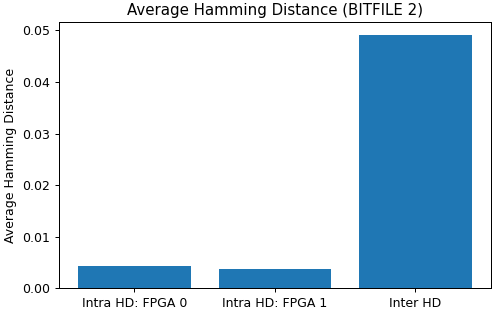

In [112]:
# get data to plot (NumPy recommended)

x_axis=["Intra HD: FPGA 0", "Intra HD: FPGA 1", "Inter HD"]
average_y_axis=[np.average(nparray_fpga0_bit2), np.average(nparray_fpga1_bit2), np.average(nparray_inter_bit2)]


# makes new empty plot
plt.figure(figsize=(5.5,3.5), constrained_layout=True)
# figsize: (width, height) in inches.
# constrained_layout: makes sures the plot fits tight within the image boundaries.

# plots the data
plt.bar(x_axis, average_y_axis)


# format your plots
plt.title("Average Hamming Distance (BITFILE 2)")            # adds title
# plt.xlabel("")          # adds x-axis label
plt.ylabel("Average Hamming Distance")          # adds y-axis label
# plt.xlim(0, 3)               # sets x-axis min/max values
# plt.ylim(0, 0.2)           # sets y-axis min/max values
# plt.legend(loc="upper right") # adds legend
# ... and more ...



# show the plot on your screen
plt.show()

# saves the plot
plt.savefig("../Figures/avg_hd_bitfile2.pdf") # PDF recommended
plt.savefig("../Figures/avg_hd_bitfile2.png", dpi=300)

<IPython.core.display.Javascript object>


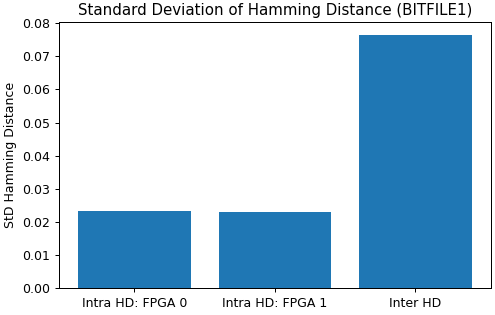

In [113]:
# get data to plot (NumPy recommended)

x_axis=["Intra HD: FPGA 0", "Intra HD: FPGA 1", "Inter HD"]
std_y_axis=[np.std(nparray_fpga0), np.std(nparray_fpga1), np.std(nparray_inter)]


# makes new empty plot
plt.figure(figsize=(5.5,3.5), constrained_layout=True)
# figsize: (width, height) in inches.
# constrained_layout: makes sures the plot fits tight within the image boundaries.

# plots the data
plt.bar(x_axis, std_y_axis)

# format your plots
plt.title("Standard Deviation of Hamming Distance (BITFILE1)")            # adds title
# plt.xlabel("")          # adds x-axis label
plt.ylabel("StD Hamming Distance")          # adds y-axis label
# plt.xlim(0, 3)               # sets x-axis min/max values
# plt.ylim(0, 0.2)           # sets y-axis min/max values
# plt.legend(loc="upper right") # adds legend
# ... and more ...



# show the plot on your screen
plt.show()

# saves the plot
plt.savefig("../Figures/std_bitfile1.pdf") # PDF recommended
plt.savefig("../Figures/std_bitfile1.png", dpi=300)

<IPython.core.display.Javascript object>


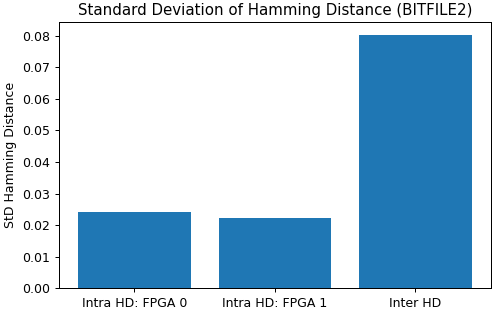

In [115]:
# get data to plot (NumPy recommended)

x_axis=["Intra HD: FPGA 0", "Intra HD: FPGA 1", "Inter HD"]
std_y_axis=[np.std(nparray_fpga0_bit2), np.std(nparray_fpga1_bit2), np.std(nparray_inter_bit2)]


# makes new empty plot
plt.figure(figsize=(5.5,3.5), constrained_layout=True)
# figsize: (width, height) in inches.
# constrained_layout: makes sures the plot fits tight within the image boundaries.

# plots the data
plt.bar(x_axis, std_y_axis)

# format your plots
plt.title("Standard Deviation of Hamming Distance (BITFILE2)")            # adds title
# plt.xlabel("")          # adds x-axis label
plt.ylabel("StD Hamming Distance")          # adds y-axis label
# plt.xlim(0, 3)               # sets x-axis min/max values
# plt.ylim(0, 0.2)           # sets y-axis min/max values
# plt.legend(loc="upper right") # adds legend
# ... and more ...



# show the plot on your screen
plt.show()

# saves the plot
plt.savefig("../Figures/std_bitfile2.pdf") # PDF recommended
plt.savefig("../Figures/std_bitfile2.png", dpi=300)